In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('./src')

import io_utils
import metrics
import viz

df = io_utils.get_df()

df.info()

#df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  2500 non-null   int64         
 1   date      2500 non-null   datetime64[ns]
 2   city      2500 non-null   object        
 3   category  2500 non-null   object        
 4   price     2500 non-null   float64       
 5   units     2500 non-null   int64         
 6   revenue   2500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 136.8+ KB


### 1. Vad säljer vi? – vilka kategorier driver mest intäkt?
Kategorier 'Electronics', 'Sports' respektive ' Clothing' driver mest intäkt.

In [ ]:
from metrics import unique_products, category_revenue

print(f"Vi säljer följande unika kategorier: \n {unique_products}")

print(f"\nIntäkt per kategori: \n {category_revenue}")

In [ ]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots()
category_revenue.plot(kind="bar", ax=ax)
ax.set_title("Intäkt per kategorie")
ax.set_xlabel("Kategorie")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 2. Var säljer vi? – vilka städer står för störst intäkt?
Stockholm, Göteborg respektive Malmö står för störst intakt

In [ ]:
from metrics import units_per_city, top_cities, category_per_city
top_cities # sum of revenue per city

In [ ]:
units_per_city #sum of units per category and city

In [ ]:
category_per_city #sum of revenue per category and city.

In [ ]:
fig, ax = plt.subplots()
category_per_city.plot(kind='bar', ax=ax)
ax.set_title("Intäkter per stad och kategori")
ax.set_xlabel("Stad")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?


In [ ]:
from metrics import revenue_by_month, revenue_by_day_of_month

revenue_by_month # Shows the total revenue for the different months


In [ ]:
revenue_by_day_of_month # Shows the best selling days of the months

In [ ]:
import matplotlib.pyplot as plt

plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue by month")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.bar(revenue_by_day_of_month.index, revenue_by_day_of_month.values)
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Best selling days of the months")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.


In [ ]:

# AOV, standard deviation, minimum and maximum order value
order_value = df["revenue"].agg(["mean", "std", "min", "max"])
order_value.index = [
        "Genomsnittligt ordervärde:",
        "Standardavvikelse:",
        "Lägsta ordervärdet:",
        "Högsta ordervärdet:"
    ]
for name, value in order_value.astype(int).items():
  print(f"{name} {value} kr")


#Distribution of order values
fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={"height_ratios":[4,1]})

ax_hist.hist(df["revenue"], bins=50)
ax_hist.set_title("Spridning av ordervärden")

ax_hist.set_ylabel("Antal ordrar")
ax_hist.grid(True, axis="y")

ax_box.boxplot(df["revenue"], vert=False)
ax_box.set_xlabel("Ordervärde (kr)")
ax_box.set_yticklabels("")
ax_box.grid(True, axis="x")

plt.tight_layout()



### 5. Topp-listor – topp-3 kategorier efter intäkt.


In [ ]:
# Summera intäkt per kategori
kategori_sum = df.groupby("category")["revenue"].sum()

# Plocka fram topp 3
top3 = kategori_sum.nlargest(3)

# Totala intäkten (avrundad uppåt till närmaste 500, med min 1000)
total = kategori_sum.sum()
total_rounded = max(1000, int(np.ceil(total / 500.0) * 500))

print("Top 3 kategorier baserat på omsättning:")
print(top3)
print(f"\nTotal omsättning: {total} (avrundad till {total_rounded})")

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?


In [70]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

daily_revenue = (
    df.set_index("date")
      .sort_index()["revenue"]
      .resample("D")
      .sum()
)

print("Antal dagar som analyseras:", daily_revenue.shape[0])

Antal dagar som analyseras: 182


In [71]:
Z = 3.0
anomalies, z = metrics.detect_anomalies(daily_revenue, threshold=Z)

Antal dagar som avviker mer än 3.0 standardavvikelser: 2


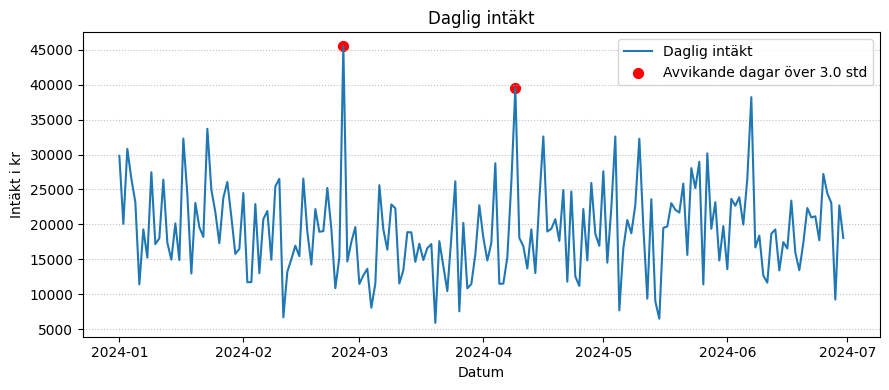

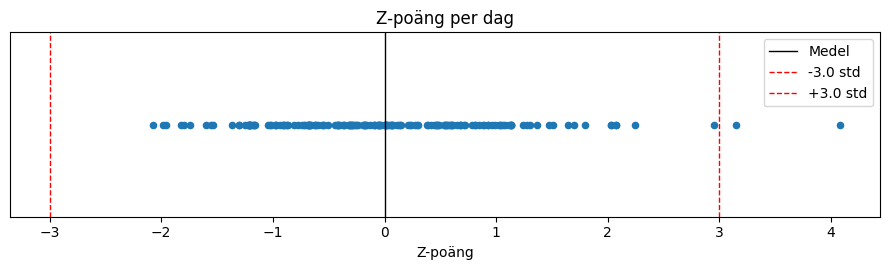

In [72]:
viz.plot_anomalies(daily_revenue, anomalies, z, Z)

Figur 1 visar daglig intäkt, där röda punkter markerar dagar som avviker kraftigt från det normala.  
Figur 2 visar motsvarande Z-poäng, där de röda strecken markerar gränsen för +/-3 standardavvikelser.

### Rekommendationer:

Ni ska avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.